# Moped reviews analysis

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating.                                                                                           |
| Reliability      | Numeric, reliability rating.                                                                                             |
| Extra Feature    | Numeric, extra feature rating.                                                                                         |
| Comfort          | Numeric, comfort rating.                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating.                                                                                        |
| Value for money  | Numeric, value for money rating.                                                                                         |

In [1]:
import pandas as pd

data = pd.read_csv('datasets/moped.csv')
display(data.head(10))

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0
5,Commuting,> 6 months,TVS iQube,5.0,1.0,NaN,5.0,NaN,2.0
6,Commuting,> 6 months,TVS iQube,3.0,2.0,NaN,4.0,NaN,3.0
7,Commuting,<= 6 months,TVS iQube,3.0,1.0,NaN,2.0,NaN,1.0
8,Commuting,<= 6 months,TVS iQube,3.0,3.0,NaN,4.0,NaN,3.0
9,Commuting,<= 6 months,TVS iQube,5.0,3.0,NaN,4.0,NaN,3.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [3]:
data['Owned for'].replace(['<= 6 months','> 6 months'], 'Owned', inplace=True)
data.rename(columns = {'Owned for':'Owned'}, inplace = True)

data = data.fillna(0)

display(data.head(10))

,Used it for,Owned,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0
1,Leisure,Owned,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0
2,Commuting,Owned,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0
3,Commuting,Owned,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0
4,Commuting,Owned,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0
5,Commuting,Owned,TVS iQube,5.0,1.0,0.0,5.0,0.0,2.0
6,Commuting,Owned,TVS iQube,3.0,2.0,0.0,4.0,0.0,3.0
7,Commuting,Owned,TVS iQube,3.0,1.0,0.0,2.0,0.0,1.0
8,Commuting,Owned,TVS iQube,3.0,3.0,0.0,4.0,0.0,3.0
9,Commuting,Owned,TVS iQube,5.0,3.0,0.0,4.0,0.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned             713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    713 non-null    float64
 6   Comfort           713 non-null    float64
 7   Maintenance cost  713 non-null    float64
 8   Value for Money   713 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [5]:
data.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
std,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
75%,5.000000,5.000000,1.000000,5.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
display(data.value_counts('Used it for'))
display(data.value_counts('Owned'))
display(data.value_counts('Model Name'))

Used it for
Commuting    553
Leisure      160
dtype: int64

Owned
Owned          578
Never owned    135
dtype: int64

Model Name
Hero Electric Flash        94
Hero Electric Optima       75
Okinawa Praise             73
Revolt RV 400              44
PURE EV EPluto 7G          40
Hero Electric Photon       34
Tork Kratos                33
Ather 450X                 26
OLA S1 Pro                 25
Ampere Magnus EX           25
Ampere REO                 21
Benling Aura               19
OLA S1                     18
TVS iQube                  17
Ampere Magnus Pro          16
PURE EV ETrance Neo        16
Bajaj Chetak               13
Okinawa Ridge Plus         12
Okinawa i-Praise           11
Bounce Infinity E1         10
Hero Electric Optima CX     9
Ampere Zeal                 9
Techo Electra Raptor        8
Hero Electric NYX           8
Techo Electra Emerge        7
Okinawa Lite                6
Revolt RV 300               6
Okinawa R30                 6
Yo Drift                    5
Joy e-bike Wolf             5
Gemopai Ryder               5
Odysse Evoqis               3
Hero Electric Atria         3

## Data Validation 

- Shape of our dataset is (719, 9). There are three categorial columns and six numerical (float64) in dataset. There are NaN values in "Extra Features", "Comfort", "Maintenance cost" and "Value for Money" columns.

- Rows of "Owned for" column that indicate ownership were combined into the category “Owned” (Name of the column was changed to "Owned"). 
 
- All NaN values in "Extra Features", "Comfort", "Maintenance cost" and "Value for Money" columns were replaced with 0.
 
- After changes every column meets the criteria in the data dictionary.

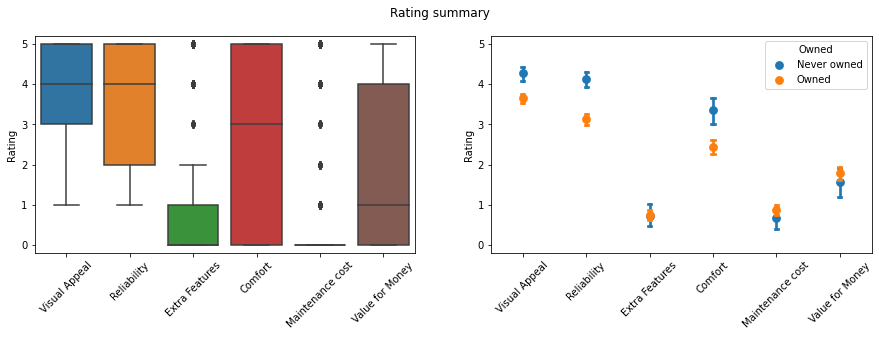

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

data_melt = data.loc[:,'Owned':].melt(['Owned', 'Model Name'], var_name = 'cols', value_name = 'vals')
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data=data_melt, x='cols', y='vals', ax=ax[0])
sns.pointplot(data = data_melt, x='cols', y='vals', hue='Owned', capsize=0.05, join = False, ax=ax[1])
plt.suptitle("Rating summary")
ax[0].set(ylabel='Rating', xlabel='')
ax[0].set_ylim([-0.2, 5.2])
ax[0].tick_params(axis='x', rotation=45)
ax[1].set(ylabel='Rating', xlabel='')
ax[1].set_ylim([-0.2, 5.2])
ax[1].tick_params(axis='x', rotation=45)
plt.show()

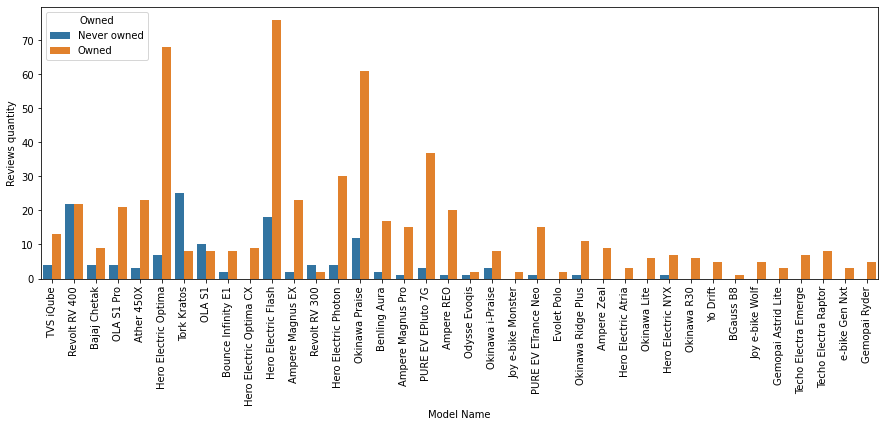

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data = data, x = 'Model Name', hue='Owned')
plt.xticks(rotation=90)
plt.ylabel('Reviews quantity')
plt.show()

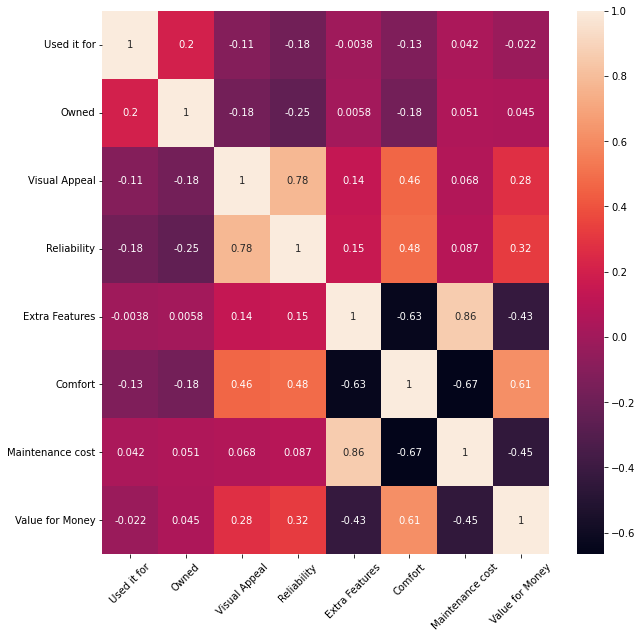

In [9]:
data['Owned'].replace(['Owned'], 1, inplace=True)
data['Owned'].replace(['Never owned'], 0, inplace=True)

data['Used it for'].replace(['Commuting'], 1, inplace=True)
data['Used it for'].replace(['Leisure'], 0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation = 45)
plt.show()

In [10]:
data_dum = pd.get_dummies(data, drop_first=False)
display(data_dum.head())

,Used it for,Owned,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name_Ampere Magnus EX,Model Name_Ampere Magnus Pro,...,Model Name_PURE EV EPluto 7G,Model Name_PURE EV ETrance Neo,Model Name_Revolt RV 300,Model Name_Revolt RV 400,Model Name_TVS iQube,Model Name_Techo Electra Emerge,Model Name_Techo Electra Raptor,Model Name_Tork Kratos,Model Name_Yo Drift,Model Name_e-bike Gen Nxt
0,1,0,3.0,4.0,0.0,4.0,0.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,3.0,1.0,0.0,3.0,0.0,3.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,4.0,4.0,0.0,5.0,0.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1.0,1.0,0.0,1.0,0.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3.0,4.0,0.0,3.0,0.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Exploratory Analysis

- Boxplot of rating shows us that "Extra Features", "Maintenance cost" and "Value for Money" ratings' median is very low. It happens due to the big amount of NaN values in these columns in the original dataset that were raplced with 0. Pointplot also shows us difference in average ratings for "Owned" and "Never owned" options. From this plot we understand that there is a difference between users' rating who either owned or never owned a moped for "Visual Appeal", "Reliability" and "Comfort" ratings. And there is no significant difference for "Extra Features", "Maintenance cost" and "Value for Money" ratings. This is the reason don't take into account these three ratings ("Extra Features", "Maintenance cost", "Value for Money") in future modelling.

- Countplot of reviews quantity versus Model name splitted into "Owned" and "Never owned" options shows us that there are very different ratio of "Owned"/"Never owned" for different moped models. Due to this factor we can suppose that "Model name" is a significant parameter for our future model.

- To plot the heatmap of our data we should convert categorial variables to numerical. "Owned" and "Never owned" entries were replaced with "1" and "0" respectively in the "Owned" columns. And "Commuting" and "Leisure" entries were replaced with "1" and "0" respectively in the "Used it for" column.

- Heatmap shows us that "Visual Appeal", "Reliability", "Comfort" and "Used it for" variables have some correlation with "Owned" variable. And "Extra Features", "Maintenance cost" and "Value for Money" variables have very low correlation with "Owned" variable. This confirms our previous conclusions.

- Also for future modelling were created data_dum version of data where categorial variable "Model name" were converted into dummy variables

In [11]:
from sklearn.model_selection import train_test_split

X = data_dum.drop(["Owned", "Extra Features", "Maintenance cost", "Value for Money"], axis=1).values
y = data_dum["Owned"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps_logreg = [('scaler', StandardScaler()), ('logreg', LogisticRegression())]
pipeline_logreg = Pipeline(steps_logreg)
pipeline_logreg.fit(X_train, y_train)

steps_knn = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline_knn = Pipeline(steps_knn)
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

## Model Fitting

Our goal is to predict which reviews come from people who have never owned the moped before. So this is a binary classififcation problem where we should predict value of the "Owned" variable ("1" for "Owned" and "0" for "Never owned").

For baseline model I selected a Logistic Regression model because this model is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. This is easy, fast and simple classification method for linear classification problems. This is what we actually need in this case study.

For comparison model I selected k-nearest neighbors model because this is easy and simple machine learning model with few hyperparameters to tune. The biggest minus of this model is large computation cost during runtime if sample size is large. But in our case sample size isn't large, so I suppose this method to be the best comparison model.

For model fitting were created X and y variables. Then were applied train_test_split function to create train and test data.

Also for both models StandarScaler was applied because our variables have different range and in such cases the use of StandarScaler increases the accuracy of the models.

In [13]:
from sklearn.metrics import accuracy_score, recall_score

y_pred_logreg = pipeline_logreg.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)

print("Logistic Regression. Accuracy: {:.2f}, Specifity: {:.2f}".format(accuracy_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_logreg, pos_label=0)))
print("KNeighborsClassifier. Accuracy: {:.2f}, Specifity: {:.2f}".format(accuracy_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn, pos_label=0)))

Logistic Regression. Accuracy: 0.85, Specifity: 0.40
KNeighborsClassifier. Accuracy: 0.82, Specifity: 0.37


In [14]:
import numpy as np

for fit_intercept in [True, False]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear']:
        acc = []
        spec = []

        for i in range(100):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=fit_intercept, solver=solver))]
            pipeline = Pipeline(steps)
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            acc.append(accuracy_score(y_test, y_pred))
            spec.append(recall_score(y_test, y_pred, pos_label=0))
        print("fit_intercept: {:b}, solver: {:s}. Accuracy: {:.3f}, Specifity: {:.3f}"
              .format(fit_intercept, solver, np.mean(acc), np.mean(spec)))

fit_intercept: 1, solver: newton-cg. Accuracy: 0.839, Specifity: 0.364
fit_intercept: 1, solver: lbfgs. Accuracy: 0.847, Specifity: 0.373
fit_intercept: 1, solver: liblinear. Accuracy: 0.842, Specifity: 0.353
fit_intercept: 0, solver: newton-cg. Accuracy: 0.762, Specifity: 0.609
fit_intercept: 0, solver: lbfgs. Accuracy: 0.765, Specifity: 0.613
fit_intercept: 0, solver: liblinear. Accuracy: 0.762, Specifity: 0.612


In [15]:
for neighbors in range(1,11):
    acc = []
    spec = []

    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = neighbors))]
        pipeline = Pipeline(steps)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))
        spec.append(recall_score(y_test, y_pred, pos_label=0))
    print("n_neighbors: {}. Accuracy: {:.3f}, Specifity: {:.3f}"
            .format(neighbors, np.mean(acc), np.mean(spec)))

n_neighbors: 1. Accuracy: 0.773, Specifity: 0.375
n_neighbors: 2. Accuracy: 0.715, Specifity: 0.530
n_neighbors: 3. Accuracy: 0.808, Specifity: 0.341
n_neighbors: 4. Accuracy: 0.777, Specifity: 0.441
n_neighbors: 5. Accuracy: 0.819, Specifity: 0.346
n_neighbors: 6. Accuracy: 0.817, Specifity: 0.418
n_neighbors: 7. Accuracy: 0.833, Specifity: 0.324
n_neighbors: 8. Accuracy: 0.826, Specifity: 0.373
n_neighbors: 9. Accuracy: 0.830, Specifity: 0.308
n_neighbors: 10. Accuracy: 0.830, Specifity: 0.345


## Model Evaluation

The main metric is Specificity, because we should predict as much as possible reviews from the people who had never owned a moped. And also in our original dataset "Never owned" rows are only ~19% of all the rows, so the accuracy can't be the main metric (for example if we fill predictions only with "1" (corresponds to the case that every review is from real moped owner) we'll achieve ~81% accuracy).

Also during computations I noticed that there is a huge dependence of the metric from train split, it varies in tens percents. So I decided to run the model fitting to 100 different train/test splits and take an average meanings of metrics.

Also I made a hyperparameter tuning:
- In logistic regression I varied fit_intercept (True/False) and solver ('newton-cg' / 'lbfgs' / 'liblinear')
- In k-nearest neighbors I varied n_neighbors from 1 to 10

The best specifity (61.3 %) showed Logistic Regression with fit_intercept = False and lbfgs solver (but there is no significant difference between other solvers, so we can use any of them). Accuracy of this method is 76.5%. I suppose this model with this parameters to be the best performing approach in this case. But of course in real case I would like to discuss my results with customer because when we achieve higher specifity we get lower accuracy. So we should find out what ratio between accuracy and specifity corresponds to the customer goals best.